# Задание
1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью трех подходящих для задачи метрик.
5. Постройте модель и оцените качество модели с использованием кросс-валидации. Проведите эксперименты с тремя различными стратегиями кросс-валидации.
6. Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.
7. Повторите пункт 4 для найденного оптимального значения гиперпараметра K. Сравните качество полученной модели с качеством модели, полученной в пункте 4.
8. Постройте кривые обучения и валидации.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

%matplotlib inline 
sns.set(style="ticks")

In [0]:
url = 'https://raw.githubusercontent.com/Smet1/bmstu_ml/master/lab4/data.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [543]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [544]:
row_number = df.shape[0]
column_number = df.shape[1]

print('Данный датасет содержит {} строк и {} столбца.'.format(row_number, column_number))

Данный датасет содержит 4600 строк и 18 столбца.


## Обработка пропусков в данных

In [0]:
for col in df.columns:
    null_count = df[df[col].isnull()].shape[0]
    if null_count > 0:
        column_type = df[col].dtype
        percent = round((null_count / row_number) * 100, 3)
        print('{} - {} - {}. Тип - {}'.format(col, null_count, percent, column_type))

In [546]:
for col in df.columns:
    column_type = df[col].dtype
    print('{} - тип: {}'.format(col, column_type))

date - тип: object
price - тип: float64
bedrooms - тип: float64
bathrooms - тип: float64
sqft_living - тип: int64
sqft_lot - тип: int64
floors - тип: float64
waterfront - тип: int64
view - тип: int64
condition - тип: int64
sqft_above - тип: int64
sqft_basement - тип: int64
yr_built - тип: int64
yr_renovated - тип: int64
street - тип: object
city - тип: object
statezip - тип: object
country - тип: object


Удаление или заполнение пропусков, не требуется, так как в датасете отсутствуют пустые значения

## Кодирование категориальных признаков

In [547]:
for col in df.columns:
    column_type = df[col].dtype
    if column_type == 'object':
        print(col)

date
street
city
statezip
country


In [548]:
print(len(df['date'].unique()))
print(len(df['street'].unique()))
print(len(df['city'].unique()))
print(len(df['statezip'].unique()))
print(len(df['country'].unique()))

70
4525
44
77
1


In [0]:
# кодируем
leDate = LabelEncoder()
df['date'] = leDate.fit_transform(df['date'])

leStreet = LabelEncoder()
df['street'] = leStreet.fit_transform(df['street'])

leCity = LabelEncoder()
df['city'] = leCity.fit_transform(df['city'])

leStatezip = LabelEncoder()
df['statezip'] = leStatezip.fit_transform(df['statezip'])

leCountry = LabelEncoder()
df['country'] = leCountry.fit_transform(df['country'])

In [0]:
# проверяем остались ли признаки
for col in df.columns:
    column_type = df[col].dtype
    if column_type == 'object':
        print(col)

## Разделение выборки на обучающую и тестовую

In [551]:
from sklearn.model_selection import train_test_split

df.astype({'bedrooms': 'int64'}).dtypes

print(len(df['bedrooms'].unique()))

df_x = df.loc[:, df.columns != 'bedrooms']
df_y = df['bedrooms']
train_x_df, test_x_df, train_y_df, test_y_df = train_test_split(df_x, df_y, test_size=0.3, random_state=346705925)

10


In [552]:
row_number = train_x_df.shape[0]
column_number = train_x_df.shape[1]

print('Тренировочный датасет содержит {} строк и {} столбцов.'.format(row_number, column_number))

Тренировочный датасет содержит 3220 строк и 17 столбцов.


In [553]:
row_number = test_x_df.shape[0]
column_number = test_x_df.shape[1]

print('Тестовый датасет содержит {} строк и {} столбцов.'.format(row_number, column_number))

Тестовый датасет содержит 1380 строк и 17 столбцов.


## Обучение модели с произвольным гиперпараметром

In [0]:
from sklearn.neighbors import KNeighborsClassifier

# 2 ближайших соседа
cl_2 = KNeighborsClassifier(n_neighbors=2)
cl_2.fit(train_x_df, train_y_df)

target_2 = cl_2.predict(test_x_df)

## Оценка качества модели

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, balanced_accuracy_score

### Accuracy

In [556]:
balanced_accuracy_score(test_y_df, target_2)

0.1460053246722267

### Матрица ошибок

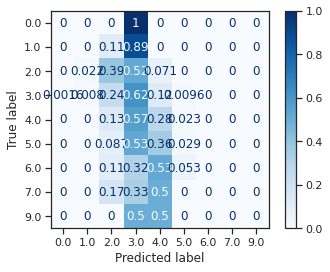

In [557]:
import matplotlib.pyplot as plt

plot_confusion_matrix(cl_2, test_x_df, test_y_df, cmap=plt.cm.Blues, normalize='true')

## Кросс-валидация

In [558]:
from sklearn.model_selection import KFold, RepeatedKFold, ShuffleSplit, cross_val_score


kf = KFold(n_splits=5)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), df_x, df_y, scoring='accuracy', cv=kf)

round(scores.mean(), 2)

0.45

In [559]:
kf = RepeatedKFold(n_splits=3, n_repeats=2)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), df_x, df_y, scoring='accuracy', cv=kf)

round(scores.mean(), 2)

0.45

In [560]:
kf = ShuffleSplit(n_splits=5, test_size=0.25)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), df_x, df_y, scoring='accuracy', cv=kf)

round(scores.mean(), 2)

0.45

## Подбор гиперпараметра

In [0]:
import numpy as np

n_range = np.array(range(1, 50, 2))
tuned_parameters = [{'n_neighbors': n_range}]

In [562]:
from sklearn.model_selection import GridSearchCV

clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=RepeatedKFold(n_splits=3, n_repeats=2), scoring='accuracy')
clf_gs.fit(train_x_df, train_y_df)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=3, random_state=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [563]:
print('Наилучшее значение параметра k - {}'.format(clf_gs.best_params_['n_neighbors']))

Наилучшее значение параметра k - 41


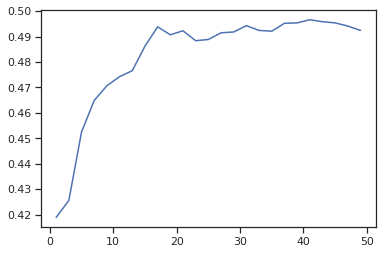

In [564]:
plt.plot(n_range, clf_gs.cv_results_["mean_test_score"]);

## Обучение модели при оптимальном параметре

In [0]:
clf_gs.best_estimator_.fit(train_x_df, train_y_df)
target_final = clf_gs.best_estimator_.predict(test_x_df)

In [566]:
print('Точность при оптимальном параметре - {}'.format(round(accuracy_score(test_y_df, target_final), 2)))

print('Точность при случайно выбранном параметре - {}'.format(round(balanced_accuracy_score(test_y_df, target_2), 2)))

Точность при оптимальном параметре - 0.48
Точность при случайно выбранном параметре - 0.15


## Кривые обучения и валидации

In [0]:
from sklearn.model_selection import learning_curve, validation_curve

# кривая обучения
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None):
    train_sizes=np.linspace(.1, 1.0, 5)

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  % (min_groups, self.n_splits)), UserWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

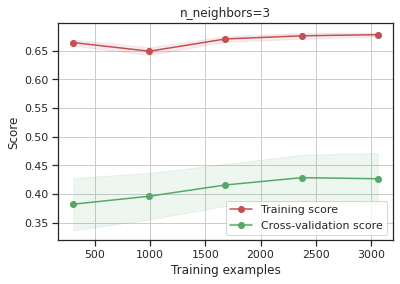

In [568]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=3), 'n_neighbors=3', train_x_df, train_y_df, cv=20)

In [0]:
# кривая валидации
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name,
        param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean,
                 label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  % (min_groups, self.n_splits)), UserWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

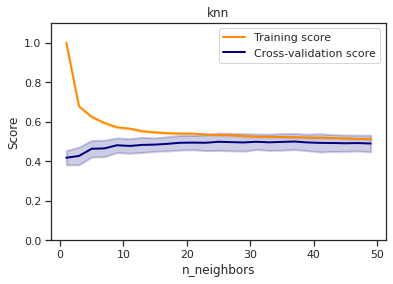

In [570]:
plot_validation_curve(KNeighborsClassifier(), 'knn', train_x_df, train_y_df, param_name='n_neighbors', param_range=n_range, cv=20, scoring="accuracy")